# EcoFOCIpy ADCP QC - 19BSP-2A

- mostly interpolated <1hr gaps
- INITIAL DATA WAS SAMPLED AT 20MINUTE - create an hourly subsample (just decimate)


In [1]:
import xarray as xa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xdf = xa.load_dataset('/Users/bell/ecoraid/2019/Moorings/19bsp2a/initial_archive/19bsp2a_velein_0055m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 10687, depth: 18)
Coordinates:
  * time             (time) datetime64[ns] 2019-04-25T07:00:00 ... 2019-09-20...
  * depth            (depth) float64 -19.0 -15.0 -11.0 -7.0 ... 41.0 45.0 49.0
  * latitude         (latitude) float64 56.87
  * longitude        (longitude) float64 -164.1
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 17.01 ... -11.12
    v_curr_comp      (latitude, longitude, time, depth) float64 14.29 ... 12.5
    w_curr_comp      (latitude, longitude, time, depth) float64 -1.2 ... 6.4
    w_curr_comp_err  (latitude, longitude, time, depth) float64 8.3 ... -0.2
    agc1             (latitude, longitude, time, depth) float64 84.0 ... 129.0
    agc2             (latitude, longitude, time, depth) float64 86.0 ... 130.0
    agc3             (latitude, longitude, time, depth) float64 91.0 ... 135.0
    agc4             (latitude, longitude, time, depth) float64 88.0 ... 136.0
Attributes: (12/13)
    Latitude_DegMMddW:                      56 52.240 N
    Longitude_DegMMddN:                     164 04.610 W
    MooringID:                              19BSP-2A
    platform_deployment_date:               2019-04-25T06:57:00Z
    platform_deployment_cruise_name:        DY1904
    platform_recovery_date:                 2019-09-20T17:17:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  
    WaterDepth:                             72.0
    date_created:                           2022-01-11T09:41:58Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

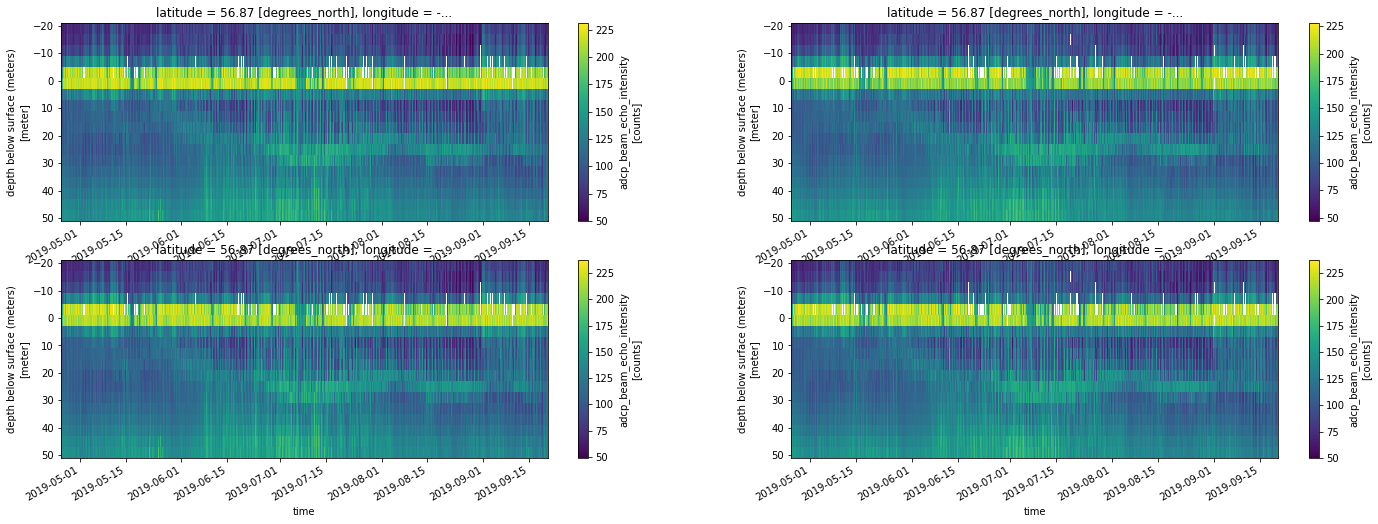

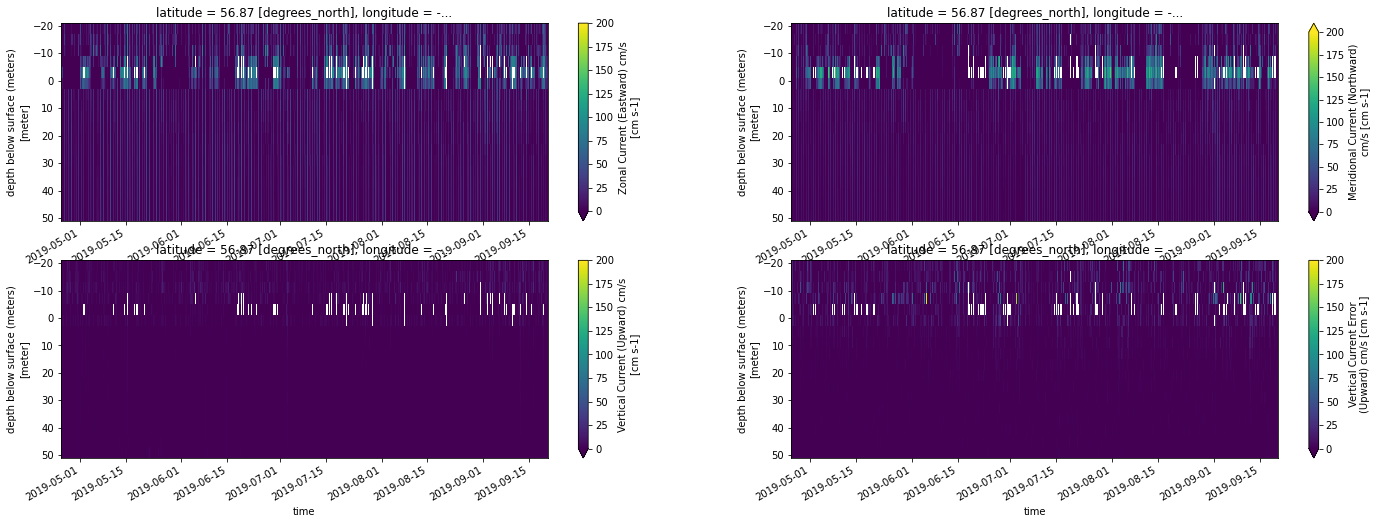

In [4]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [5]:
# xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'c

In [6]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H') #use 2H to fill all up to but not including 2hr gaps (so for hourly data thats just 1hr fills)

In [7]:
xdf.attrs['history'] = xdf.attrs['history']+'  linearly interpolated 1hr gaps'

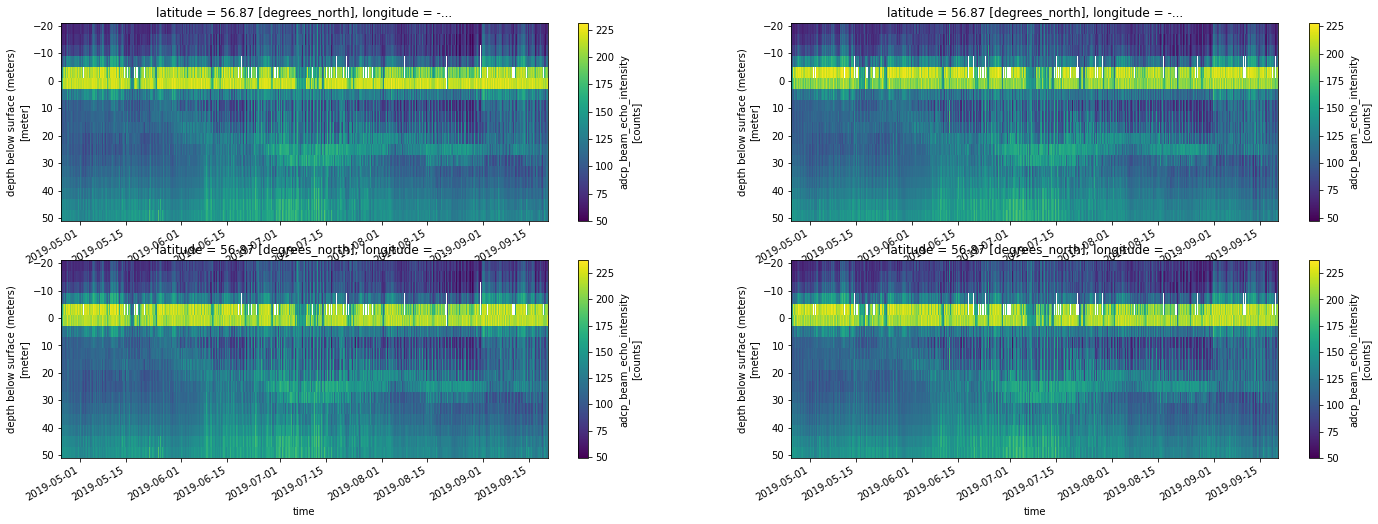

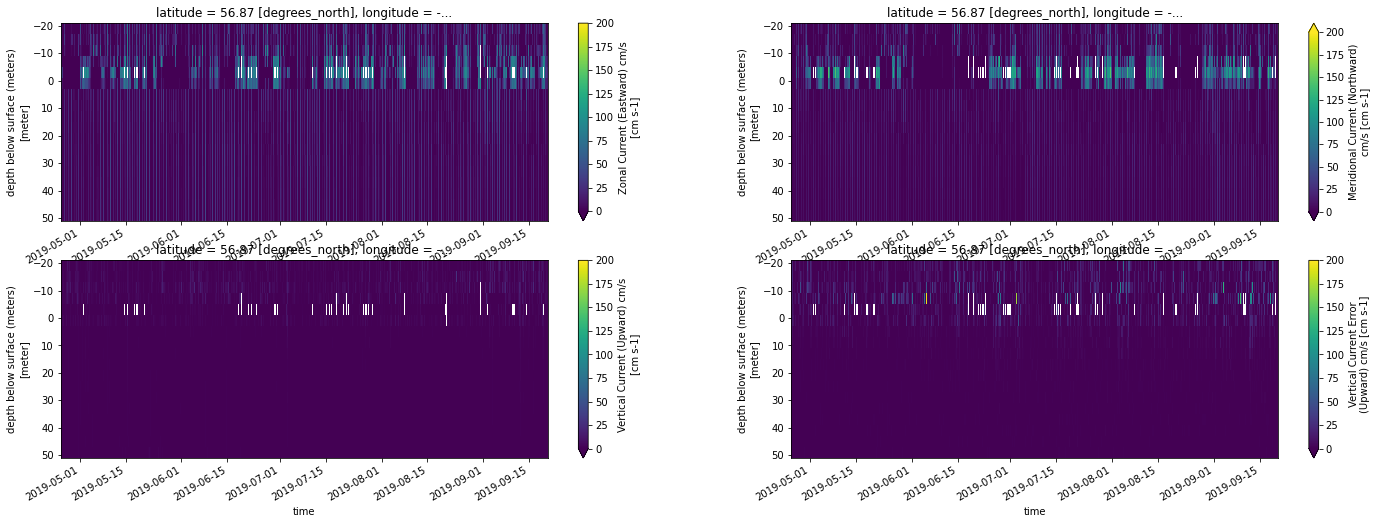

In [8]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [13]:
#label as high resolution
ixdf.to_netcdf('/Users/bell/ecoraid/2019/Moorings/19bsp2a/final_data_cf/19bsp2a_velein_0055m.hres.nc')

In [14]:
#decimate to hourly data
ixdf.resample(time="1H").nearest(tolerance="1H").to_netcdf('/Users/bell/ecoraid/2019/Moorings/19bsp2a/final_data_cf/19bsp2a_velein_0055m.nc')